## MUSICAL HITS ANALYSIS AND CLASSIFIER

### WarnerMedia Take Home Project
by Allen Wang

In [106]:
import pandas as pd #Import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('wm_project.csv')

In [108]:
df.head()

id                            track          artist  \
0   1             The Continental Walk     The Rollers   
1   2                       Two Lovers      Mary Wells   
2   3                        If I Knew   Nat King Cole   
3   4  Lara's Theme from "Dr. Zhivago"  Roger Williams   
4   5             Say Wonderful Things      Patti Page   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:00Bu7AiNb06604KMuYTQAi         0.603   0.732    0    -5.647   
1  spotify:track:00CmjeeHvAVKvx3tcIiZTy         0.678   0.405    2   -16.965   
2  spotify:track:00Vwp9jQUs52JOnbbLaz5e         0.371   0.386    1    -9.238   
3  spotify:track:00YhuN9oOmXUyLQiHjXPxt         0.361   0.280    7   -13.422   
4  spotify:track:010BIyGminG03GMg8afVAq         0.490   0.440    3    -9.387   

   mode  speechiness  ...  instrumentalness  liveness  valence    tempo  \
0     1       0.0372  ...          0.000000    0.0993    0.802  105.425   
1     1       0.0304  ...          0.000000    0.1090    0.960  105.902   
2     1       0.0308  ...          0.000467    0.0787    0.169   80.207   
3     1       0.0294  ...          0.435000    0.1440    0.213   82.298   
4     1       0.0321  ...          0.000000    0.3370    0.426  109.329   

   duration_ms  time_signature  chorus_hit  sections  hit  decade  
0       144000               3    31.93079         6  1.0     60s  
1       167000               4    29.18796         8  1.0     60s  
2       168000               4    57.12898         7  1.0     60s  
3       160000               3    38.22192         8  1.0     60s  
4       140000               3    21.83825         7  1.0     60s  

[5 rows x 21 columns]

In [109]:
df.shape

(40886, 21)

Examining the shape of the dataframe to see if there is any imbalance within the dataset and/or missing values.

In [110]:
df['hit'].value_counts()

1.0    16845
0.0    16612
Name: hit, dtype: int64

Balanced dataset makes analysis and machine learning fitting a lot easier since we don't need to account for imbalances and we can use accuracy as our success metrics. We can also use accuracy because we're not inclined towards false positives over false negatives or vice versa.

We're only interested in the rows that have a label for hit.

In [111]:
df = df[pd.notnull(df['hit'])] #Removing rows with null values for data

In [112]:
df

id                            track          artist  \
0          1             The Continental Walk     The Rollers   
1          2                       Two Lovers      Mary Wells   
2          3                        If I Knew   Nat King Cole   
3          4  Lara's Theme from "Dr. Zhivago"  Roger Williams   
4          5             Say Wonderful Things      Patti Page   
...      ...                              ...             ...   
33452  33453                           Tamuno             JFC   
33453  33454                 Tu Meri Ki Lagdi      Navv Inder   
33454  33455                Chemical Invasion         Tankard   
33455  33456              Natural's Not In It    Gang Of Four   
33456  33457        I Love a Man In a Uniform    Gang Of Four   

                                        uri  danceability  energy  key  \
0      spotify:track:00Bu7AiNb06604KMuYTQAi         0.603   0.732    0   
1      spotify:track:00CmjeeHvAVKvx3tcIiZTy         0.678   0.405    2   
2      spotify:track:00Vwp9jQUs52JOnbbLaz5e         0.371   0.386    1   
3      spotify:track:00YhuN9oOmXUyLQiHjXPxt         0.361   0.280    7   
4      spotify:track:010BIyGminG03GMg8afVAq         0.490   0.440    3   
...                                     ...           ...     ...  ...   
33452  spotify:track:7yGXpkDnLEr5iaOVbU4MRM         0.634   0.462    9   
33453  spotify:track:7yl1lvePCTJuxa1v31fRK2         0.532   0.617    1   
33454  spotify:track:7yt5frFvdI433dJwVooDWA         0.495   0.997    8   
33455  spotify:track:7zGcnkHnMpileiI0H0aIgc         0.763   0.840    0   
33456  spotify:track:7zy6jG8RIUI8qNYYVuLGbY         0.772   0.435   10   

       loudness  mode  speechiness  ...  instrumentalness  liveness  valence  \
0        -5.647     1       0.0372  ...          0.000000    0.0993    0.802   
1       -16.965     1       0.0304  ...          0.000000    0.1090    0.960   
2        -9.238     1       0.0308  ...          0.000467    0.0787    0.169   
3       -13.422     1       0.0294  ...          0.435000    0.1440    0.213   
4        -9.387     1       0.0321  ...          0.000000    0.3370    0.426   
...         ...   ...          ...  ...               ...       ...      ...   
33452    -6.674     1       0.0301  ...          0.000007    0.0736    0.349   
33453    -8.409     0       0.0508  ...          0.000000    0.1750    0.246   
33454    -2.669     1       0.1290  ...          0.221000    0.1840    0.244   
33455    -6.974     1       0.2880  ...          0.065200    0.0199    0.895   
33456   -12.612     1       0.0880  ...          0.000000    0.5140    0.920   

         tempo  duration_ms  time_signature  chorus_hit  sections  hit  decade  
0      105.425       144000               3    31.93079         6  1.0     60s  
1      105.902       167000               4    29.18796         8  1.0     60s  
2       80.207       168000               4    57.12898         7  1.0     60s  
3       82.298       160000               3    38.22192         8  1.0     60s  
4      109.329       140000               3    21.83825         7  1.0     60s  
...        ...          ...             ...         ...       ...  ...     ...  
33452  147.897       298000               3    42.20437        13  0.0     10s  
33453   90.086       184000               4    45.70233         8  0.0     10s  
33454  117.942       326000               4    38.92334        14  0.0     10s  
33455  161.340       187000               4    24.88276         8  0.0     10s  
33456  112.264       247000               4    26.47998        11  0.0     10s  

[33457 rows x 21 columns]

In [113]:
df.isnull().sum() #Checking for null values

id                  0
track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
hit                 0
decade              0
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33457 entries, 0 to 33456
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33457 non-null  int64  
 1   track             33457 non-null  object 
 2   artist            33457 non-null  object 
 3   uri               33457 non-null  object 
 4   danceability      33457 non-null  float64
 5   energy            33457 non-null  float64
 6   key               33457 non-null  int64  
 7   loudness          33457 non-null  float64
 8   mode              33457 non-null  int64  
 9   speechiness       33457 non-null  float64
 10  acousticness      33457 non-null  float64
 11  instrumentalness  33457 non-null  float64
 12  liveness          33457 non-null  float64
 13  valence           33457 non-null  float64
 14  tempo             33457 non-null  float64
 15  duration_ms       33457 non-null  int64  
 16  time_signature    33457 non-null  int64 

In [115]:
df.describe().T 

count           mean            std           min  \
id                33457.0   16729.000000    9658.348315      1.000000   
danceability      33457.0       0.540398       0.177545      0.000000   
energy            33457.0       0.579622       0.252081      0.000251   
key               33457.0       5.211226       3.536279      0.000000   
loudness          33457.0     -10.218928       5.313739    -49.253000   
mode              33457.0       0.693637       0.460989      0.000000   
speechiness       33457.0       0.072836       0.085742      0.000000   
acousticness      33457.0       0.364680       0.338739      0.000000   
instrumentalness  33457.0       0.153821       0.303009      0.000000   
liveness          33457.0       0.201887       0.173248      0.013000   
valence           33457.0       0.543262       0.267021      0.000000   
tempo             33457.0     119.320371      29.107054      0.000000   
duration_ms       33457.0  234633.350270  119879.689623  15000.000000   
time_signature    33457.0       3.894043       0.423817      0.000000   
chorus_hit        33457.0      40.023567      18.947249      0.000000   
sections          33457.0      10.462893       4.892594      0.000000   
hit               33457.0       0.503482       0.499995      0.000000   

                           25%            50%           75%          max  
id                  8365.00000   16729.000000   25093.00000    33457.000  
danceability           0.42100       0.553000       0.66900        0.988  
energy                 0.39700       0.601000       0.78800        1.000  
key                    2.00000       5.000000       8.00000       11.000  
loudness             -12.82200      -9.239000      -6.37900        3.744  
mode                   0.00000       1.000000       1.00000        1.000  
speechiness            0.03370       0.043400       0.06950        0.960  
acousticness           0.04000       0.259000       0.67700        0.996  
instrumentalness       0.00000       0.000115       0.05920        0.999  
liveness               0.09420       0.132000       0.26200        0.999  
valence                0.33100       0.559000       0.76800        0.996  
tempo                 97.39700     117.580000     136.50700      241.423  
duration_ms       173000.00000  218000.000000  266000.00000  4170000.000  
time_signature         4.00000       4.000000       4.00000        5.000  
chorus_hit            27.54947      35.808780      47.55186      433.182  
sections               8.00000      10.000000      12.00000      169.000  
hit                    0.00000       1.000000       1.00000        1.000

Creating a pairplot to see visualize variables' correlations with one another and also to check out distribution of all columns within the dataset.

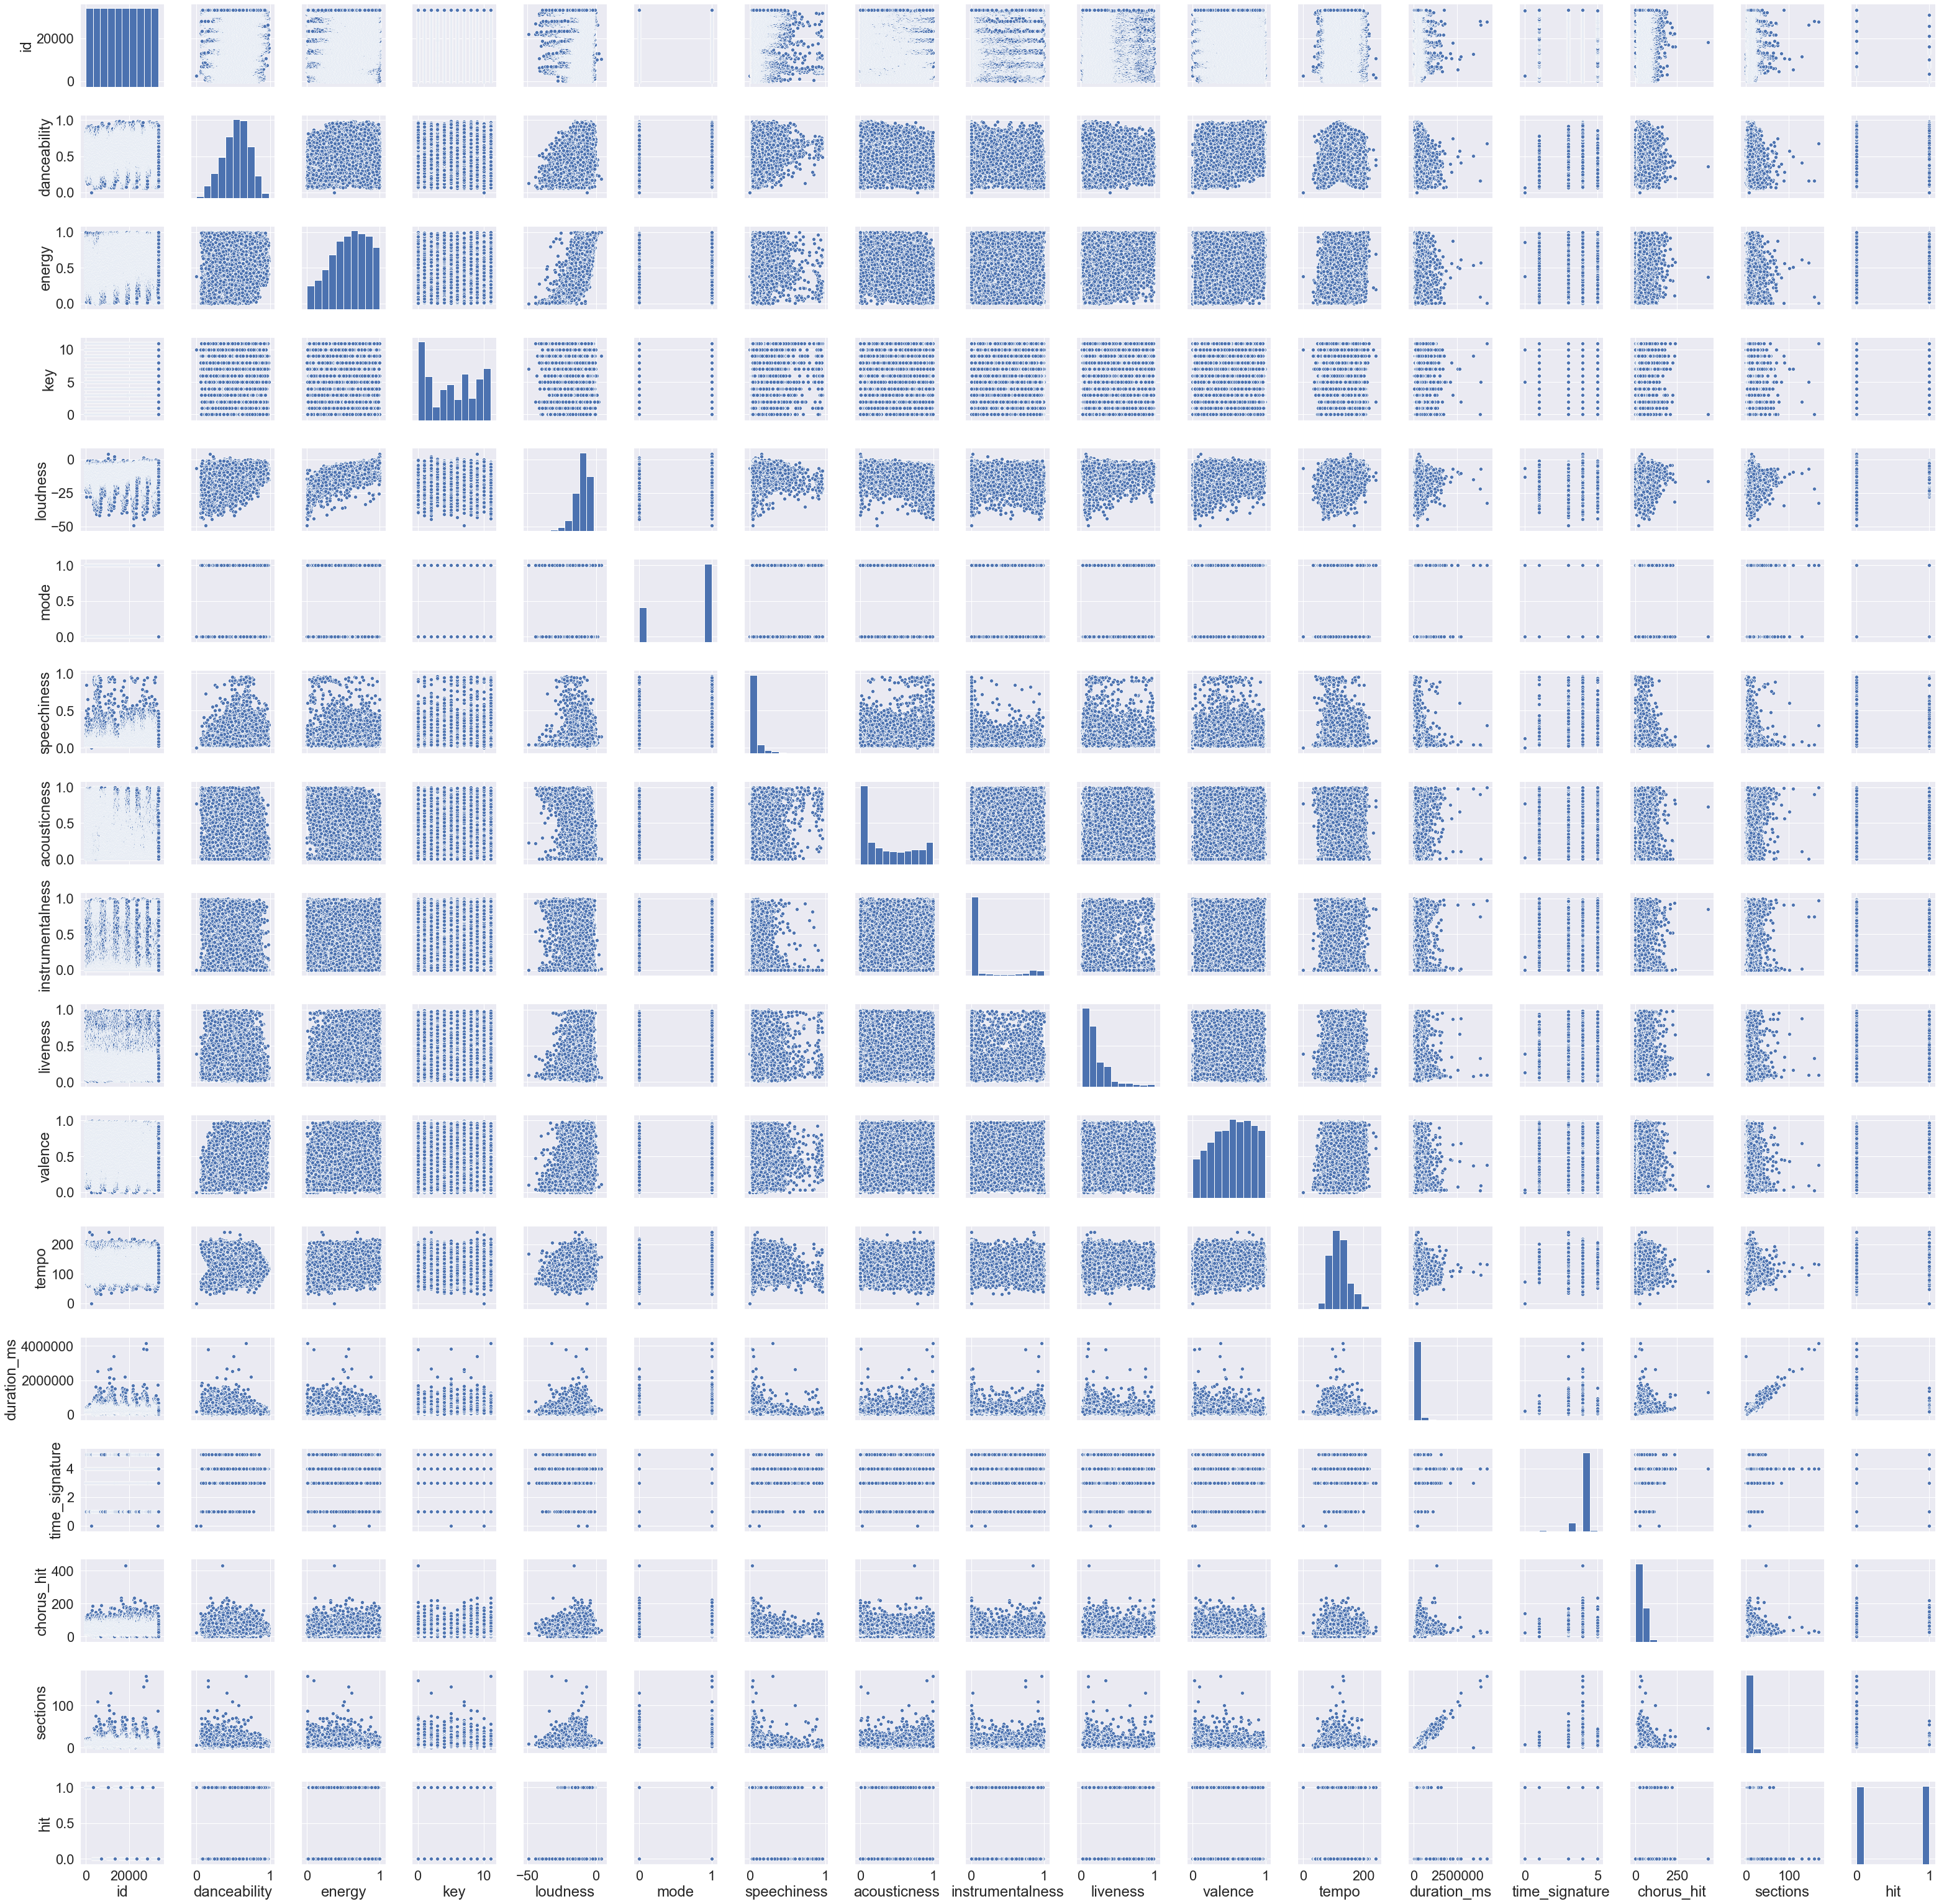

In [116]:
sns.set(font_scale=2)
sns.pairplot(df)

Some interesting observations can be made over examining the pairplot. We can see that sections and duration_ms are linearly correlated, and this makes sense because the longer the sections are the longer the song is inclined to be.

Text(0, 0.5, 'Duration (ms)')

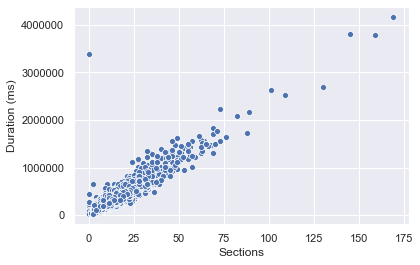

In [117]:
sns.set(font_scale=1)
sns.scatterplot(x = df['sections'], y = df['duration_ms'])
plt.xlabel('Sections')
plt.ylabel('Duration (ms)')

Another observation that can be made is a slight positive correlation between loudness and tempo. Songs that are more loud tend to lead to more upbeat and faster songs which makes sense.

Text(0, 0.5, 'Tempo')

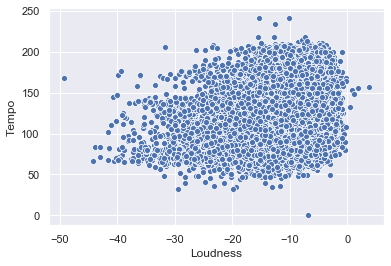

In [118]:
sns.scatterplot(x = df['loudness'], y = df['tempo'])
plt.xlabel('Loudness')
plt.ylabel('Tempo')

Creating a correlation heatmap

In [119]:
corr = df.corr()

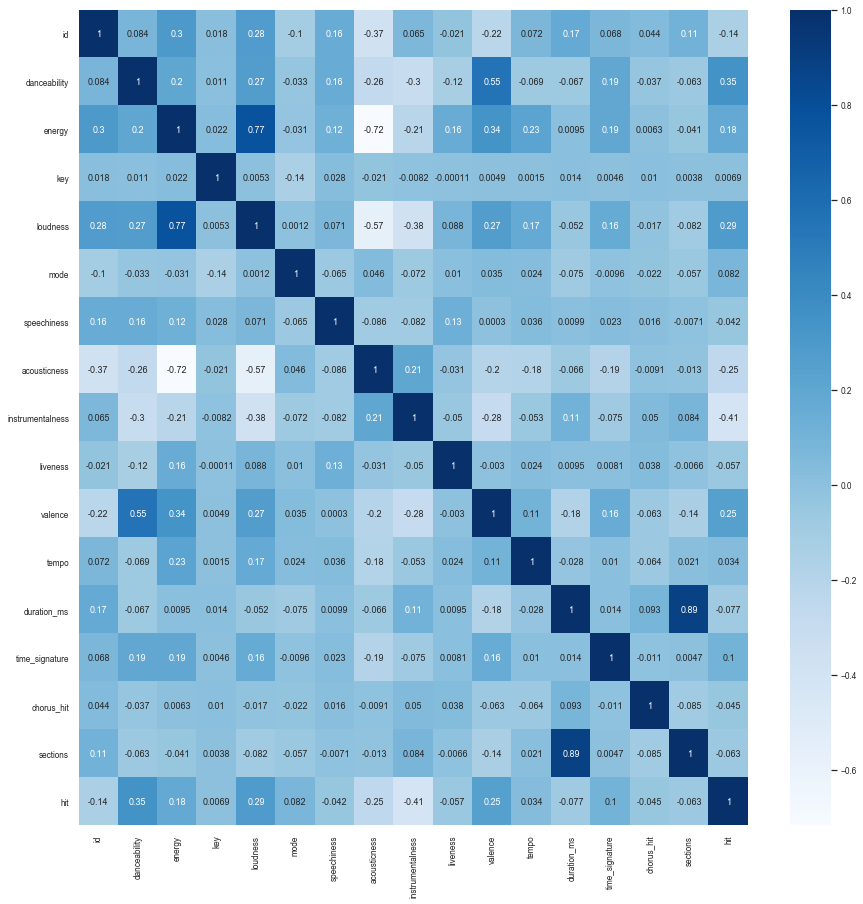

In [120]:
sns.set(font_scale=0.75)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot = True, cmap = 'Blues')

From this correlation heatmap, we can see that the column hit has high correlation with danceability, energy, loudness, mode, valence, time_signature. We can further explore these correlations through graphs.

In [121]:
df_hit = df[df['hit'] == 1.0]

In [122]:
df_hit

id                            track  \
0          1             The Continental Walk   
1          2                       Two Lovers   
2          3                        If I Knew   
3          4  Lara's Theme from "Dr. Zhivago"   
4          5             Say Wonderful Things   
...      ...                              ...   
30951  30952                          Noticed   
30952  30953                          Stutter   
30953  30954                  Keep Me In Mind   
30954  30955                        Dear Hate   
30955  30956                         What Ifs   

                                   artist  \
0                             The Rollers   
1                              Mary Wells   
2                           Nat King Cole   
3                          Roger Williams   
4                              Patti Page   
...                                   ...   
30951                           Lil Mosey   
30952                            Maroon 5   
30953                      Zac Brown Band   
30954   Maren Morris Featuring Vince Gill   
30955  Kane Brown Featuring Lauren Alaina   

                                        uri  danceability  energy  key  \
0      spotify:track:00Bu7AiNb06604KMuYTQAi         0.603   0.732    0   
1      spotify:track:00CmjeeHvAVKvx3tcIiZTy         0.678   0.405    2   
2      spotify:track:00Vwp9jQUs52JOnbbLaz5e         0.371   0.386    1   
3      spotify:track:00YhuN9oOmXUyLQiHjXPxt         0.361   0.280    7   
4      spotify:track:010BIyGminG03GMg8afVAq         0.490   0.440    3   
...                                     ...           ...     ...  ...   
30951  spotify:track:7zLYKWcXnYeHHWidalz7rj         0.699   0.558   11   
30952  spotify:track:7zmJyZL3DfYBBYbY8Rve6W         0.711   0.882    1   
30953  spotify:track:7zNM46fo01dCBidY4yGNTZ         0.684   0.715    6   
30954  spotify:track:7zOoHxDt1duHL8czY7o7ab         0.526   0.412    9   
30955  spotify:track:7zVCrzzEJU7u24sbJPXA5W         0.612   0.799   10   

       loudness  mode  speechiness  ...  instrumentalness  liveness  valence  \
0        -5.647     1       0.0372  ...          0.000000    0.0993    0.802   
1       -16.965     1       0.0304  ...          0.000000    0.1090    0.960   
2        -9.238     1       0.0308  ...          0.000467    0.0787    0.169   
3       -13.422     1       0.0294  ...          0.435000    0.1440    0.213   
4        -9.387     1       0.0321  ...          0.000000    0.3370    0.426   
...         ...   ...          ...  ...               ...       ...      ...   
30951    -7.622     1       0.0603  ...          0.000000    0.1160    0.493   
30952    -2.772     0       0.0333  ...          0.000000    0.1110    0.813   
30953    -6.132     1       0.0336  ...          0.000000    0.1810    0.563   
30954    -9.292     1       0.0385  ...          0.000000    0.1170    0.289   
30955    -4.603     1       0.0275  ...          0.000000    0.1720    0.687   

         tempo  duration_ms  time_signature  chorus_hit  sections  hit  decade  
0      105.425       144000               3    31.93079         6  1.0     60s  
1      105.902       167000               4    29.18796         8  1.0     60s  
2       80.207       168000               4    57.12898         7  1.0     60s  
3       82.298       160000               3    38.22192         8  1.0     60s  
4      109.329       140000               3    21.83825         7  1.0     60s  
...        ...          ...             ...         ...       ...  ...     ...  
30951   79.992       165000               4    25.52772         6  1.0     10s  
30952  119.991       197000               4    43.81508         8  1.0     10s  
30953   96.018       214000               4    31.29447        10  1.0     10s  
30954   79.732       220000               4    66.78981        10  1.0     10s  
30955  125.976       188000               4    27.92239         8  1.0     10s  

[16845 rows x 21 columns]

In [123]:
df_nonhit = df[df['hit'] == 0.0]

In [124]:
df_nonhit

id                                              track  \
3544    3545                                The Yellow Princess   
3545    3546          Carnival of the Animals, R. 125: Pianists   
3546    3547  El amor brujo: II. En la cueva - La Noche [in ...   
3547    3548  Improvisations On The Theme Music From Pather ...   
3548    3549                                             Sakura   
...      ...                                                ...   
33452  33453                                             Tamuno   
33453  33454                                   Tu Meri Ki Lagdi   
33454  33455                                  Chemical Invasion   
33455  33456                                Natural's Not In It   
33456  33457                          I Love a Man In a Uniform   

                       artist                                   uri  \
3544               John Fahey  spotify:track:00D9QmFumhg2J7xjic5E7o   
3545      Camille Saint-Saëns  spotify:track:00EfoGDgbySqziFMbchaS1   
3546   Philadelphia Orchestra  spotify:track:00eYU9sCYIqiGRCC2NXun1   
3547             Ravi Shankar  spotify:track:00Iqzdq2idIiTZLQwDHiX1   
3548          Harry Belafonte  spotify:track:00QHqtiDu3PAjDGI73773z   
...                       ...                                   ...   
33452                     JFC  spotify:track:7yGXpkDnLEr5iaOVbU4MRM   
33453              Navv Inder  spotify:track:7yl1lvePCTJuxa1v31fRK2   
33454                 Tankard  spotify:track:7yt5frFvdI433dJwVooDWA   
33455            Gang Of Four  spotify:track:7zGcnkHnMpileiI0H0aIgc   
33456            Gang Of Four  spotify:track:7zy6jG8RIUI8qNYYVuLGbY   

       danceability  energy  key  loudness  mode  speechiness  ...  \
3544          0.269  0.3510   11   -18.824     0       0.0403  ...   
3545          0.360  0.1450    0   -21.793     0       0.0404  ...   
3546          0.108  0.0482    8   -20.631     1       0.0369  ...   
3547          0.336  0.2470    1   -21.540     1       0.0532  ...   
3548          0.355  0.2210   10   -12.023     0       0.0286  ...   
...             ...     ...  ...       ...   ...          ...  ...   
33452         0.634  0.4620    9    -6.674     1       0.0301  ...   
33453         0.532  0.6170    1    -8.409     0       0.0508  ...   
33454         0.495  0.9970    8    -2.669     1       0.1290  ...   
33455         0.763  0.8400    0    -6.974     1       0.2880  ...   
33456         0.772  0.4350   10   -12.612     1       0.0880  ...   

       instrumentalness  liveness  valence    tempo  duration_ms  \
3544           0.872000    0.0820    0.510  109.002       293000   
3545           0.838000    0.1270    0.307   90.125        82000   
3546           0.839000    0.1040    0.055   82.371       136000   
3547           0.264000    0.2730    0.429   74.793       427000   
3548           0.000038    0.0993    0.353   90.926       235000   
...                 ...       ...      ...      ...          ...   
33452          0.000007    0.0736    0.349  147.897       298000   
33453          0.000000    0.1750    0.246   90.086       184000   
33454          0.221000    0.1840    0.244  117.942       326000   
33455          0.065200    0.0199    0.895  161.340       187000   
33456          0.000000    0.5140    0.920  112.264       247000   

       time_signature  chorus_hit  sections  hit  decade  
3544                4    24.06724        13  0.0     60s  
3545                4    27.66843         6  0.0     60s  
3546                3    43.23952         6  0.0     60s  
3547                4    65.11184        12  0.0     60s  
3548                4    57.76365         9  0.0     60s  
...               ...         ...       ...  ...     ...  
33452               3    42.20437        13  0.0     10s  
33453               4    45.70233         8  0.0     10s  
33454               4    38.92334        14  0.0     10s  
33455               4    24.88276         8  0.0     10s  
33456               4    26.47998        11  

In [125]:
df_hit['danceability'].mean()

0.6014738972989006

In [126]:
df_nonhit['danceability'].mean()

0.478465639296892

In [127]:
df_hit['energy'].mean()

0.6242159988127037

In [128]:
df_nonhit['energy'].mean()

0.5344021525403325

In [129]:
df_hit['loudness'].mean()

-8.699173701394992

In [130]:
df_nonhit['loudness'].mean()

-11.759998374668873

In [131]:
df_hit['mode'].mean()

0.7309587414663105

In [132]:
df_nonhit['mode'].mean()

0.6557909944618349

In [133]:
df_hit['valence'].mean()

0.6099101810626297

In [134]:
df_nonhit['valence'].mean()

0.4756786046231625

In [135]:
df_hit['time_signature'].mean()

3.938082517067379

In [136]:
df_nonhit['time_signature'].mean()

3.8493859860341924

Just by looking at averages it seems like danceability, energy, loudness, mode, valence, time_signature might be correlated to whether or not a song will be labeled as a hit.

Some machine learning models require variables to be normalized/standardized because variables with wider ranges may have too much influence on the outcome of the model. It seems as if most of the variables in this dataset take values from 0 to 1 or 0 or 1. However some variables take on different ranges such as loudness. We should take into consideration normalizing these variables later in the future for predictive modeling. Another procedure we need to take for predictive modelling is to format our categorical labels into one hot encoded variables specifically the decades column.

Some common binary classifiers include Logistic Regression, KNN, Random Forest Classifiers, and lastly XGBoost. Some of these algorithms requires some standardizing variables so we'll go ahead and run the data through some algorithms that don't require standardizing. (Logistic Regression, Random Forest, XGBoost)

In [137]:
dummies = pd.get_dummies(df['decade'])

In [138]:
df = df.join(dummies)

In [139]:
df = df.drop('decade', axis = 1)

In [140]:
from sklearn.model_selection import train_test_split
X = df[['danceability', 'energy', 'loudness', 'mode','valence','time_signature']]
y = df['hit']

In [141]:
X

danceability  energy  loudness  mode  valence  time_signature
0             0.603   0.732    -5.647     1    0.802               3
1             0.678   0.405   -16.965     1    0.960               4
2             0.371   0.386    -9.238     1    0.169               4
3             0.361   0.280   -13.422     1    0.213               3
4             0.490   0.440    -9.387     1    0.426               3
...             ...     ...       ...   ...      ...             ...
33452         0.634   0.462    -6.674     1    0.349               3
33453         0.532   0.617    -8.409     0    0.246               4
33454         0.495   0.997    -2.669     1    0.244               4
33455         0.763   0.840    -6.974     1    0.895               4
33456         0.772   0.435   -12.612     1    0.920               4

[33457 rows x 6 columns]

In [142]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
33452    0.0
33453    0.0
33454    0.0
33455    0.0
33456    0.0
Name: hit, Length: 33457, dtype: float64

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [144]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

pipe = make_pipeline(StandardScaler(), LogisticRegressionCV(cv = 5))
pipe.fit(X_train, y_train)



pipe.score(X_test, y_test)

0.6824566646742379

In [145]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for i in range(1,20):
    pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipe.fit(X_train, y_train)
    train_scores.append(pipe.score(X_train, y_train))
    test_scores.append(pipe.score(X_test, y_test))



In [146]:
for i in range(1,20):
    print('k-value',i,':',train_scores[i-1])

k-value 1 : 0.9995890155053241
k-value 2 : 0.8232393050625817
k-value 3 : 0.8237250140108351
k-value 4 : 0.7860638894078087
k-value 5 : 0.7850924715113021
k-value 6 : 0.7671212404259294
k-value 7 : 0.7665234447973099
k-value 8 : 0.7586773771716794
k-value 9 : 0.754903792266019
k-value 10 : 0.7499346161031197
k-value 11 : 0.7478423314029516
k-value 12 : 0.7438072109097702
k-value 13 : 0.7441434709508686
k-value 14 : 0.7407061460863067
k-value 15 : 0.7386885858397161
k-value 16 : 0.7381655146646741
k-value 17 : 0.7368204745002802
k-value 18 : 0.7363721277788157
k-value 19 : 0.732897440687465


In [147]:
for i in range(1,20):
    print('k-value',i,':',test_scores[i-1])

k-value 1 : 0.6373281530185296
k-value 2 : 0.618350268977884
k-value 3 : 0.6610878661087866
k-value 4 : 0.6530185295875672
k-value 5 : 0.6800657501494322
k-value 6 : 0.6746861924686193
k-value 7 : 0.6881350866706515
k-value 8 : 0.684997011356844
k-value 9 : 0.6954572624028691
k-value 10 : 0.6947101016138673
k-value 11 : 0.698744769874477
k-value 12 : 0.6951583980872684
k-value 13 : 0.7033771667662881
k-value 14 : 0.6993424985056784
k-value 15 : 0.7042737597130903
k-value 16 : 0.7039748953974896
k-value 17 : 0.7027794381350867
k-value 18 : 0.7045726240286909
k-value 19 : 0.7038254632396892


The score seems to plateau at around k = 13 and we can see this through a graph as well.

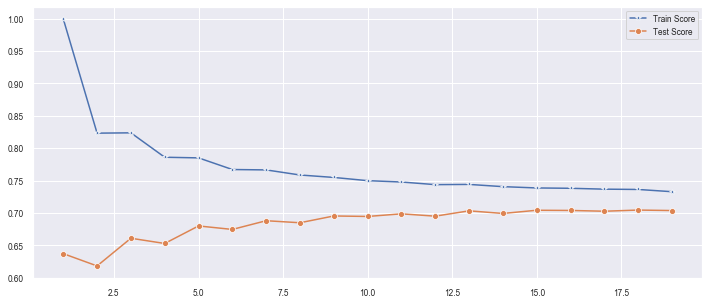

In [148]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [149]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knn_cv = KNeighborsClassifier(n_neighbors = 13)
knn_scores = cross_val_score(knn_cv, X_scaled, y, cv=5)


knn_scores.mean()

0.6850911283796212

For this step we can also use a grid search with cross validation to search for optimal parameters but in the interest of saving time, we're not going to conduct cross validation and only worry about the most important parameter in KNN which is n_neighbors.

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold

rf = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
rf_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
rf_scores.mean()        

0.7029519822879604

In [151]:
rf.fit(X_train,y_train)
feature_importance = rf.feature_importances_

6


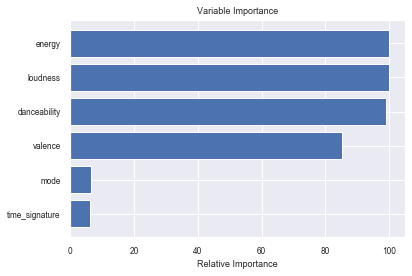

In [152]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [153]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
xgb_scores = cross_val_score(xgb_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
xgb_scores.mean()

0.7090593214027616

C:\Users\allen\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


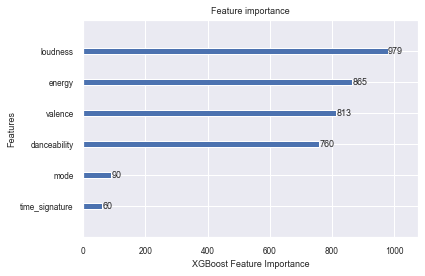

In [154]:
from xgboost import plot_importance

xgb_model.fit(X_train, y_train)

plot_importance(xgb_model)
plt.xlabel('XGBoost Feature Importance')
plt.show()

It's interesting to note that the important features vary between random forests and XGBoost. Loudness and energy seem to be interchangable in terms of importance and the same goes for valence and danceability. However mode and time signature still remain somewhat insignifcant.

Since XGB gave us the best accuracy score, I'm going to go ahead and use XGB as the final model and further improve the model performance using grid search cross validation. This conducts several fits of the model using different folds each time and using different combinations of the hyperparameters provided. The reason I'm not using grid search for every single algorithm that I tested is for the sake of efficiency and lack of time.

In [164]:
from sklearn.model_selection import KFold, GridSearchCV

params = {
        'n_estimators': [50, 100, 150, 200],
        'gamma': [i/10.0 for i in range(3)],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': range(3,10),
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
        }

grid = GridSearchCV(
  xgb_model,
  param_grid= params,
  cv= 5,
  scoring= 'accuracy',
  refit= True,
  verbose=1,
  n_jobs=-1
)

In [165]:
model = grid.fit(X_train,y_train)

Fitting 5 folds for each of 3024 candidates, totalling 15120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 49.1min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 60.8min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

[16:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [166]:
print(model.best_params_)

{'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [169]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7136879856545129

For the final model we're going to use XGBoost, the reasoning being is that XGBoost provided us with the best scores on top of providing feature importances. XGBoost is a gradient boosting decision tree algorithm that gradually implements more trees to predict the errors of the tree prior and it uses gradient descent to minimize loss. In general, XGBoost is a versatile algorithm that allows for a variety of data (tabular, unstructured, text data) and also is reliable in terms of performance and speed. It is the algorithm of choice for most Kaggle-competition winners. XGBoost is also versatile in terms of types of predictions (it works for both regression and classification). 

We're going to try and predict whether or not a random song will be a hit by taking one song from our dataset.

In [171]:
example = df.iloc[501:502,]

In [172]:
example

id                    track                  artist  \
501  502  Incense And Peppermints  Strawberry Alarm Clock   

                                      uri  danceability  energy  key  \
501  spotify:track:16iApoNZYaN6gbMtRRVV6B         0.484   0.655    4   

     loudness  mode  speechiness  ...  time_signature  chorus_hit  sections  \
501   -11.118     1       0.0316  ...               4    33.92391         9   

     hit  00s  10s  60s  70s  80s  90s  
501  1.0    0    0    1    0    0    0  

[1 rows x 26 columns]

In [173]:
example = example[['danceability', 'energy', 'loudness', 'mode','valence','time_signature']]

In [174]:
model.predict(example)

array([1.])

Correct Prediction!